In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression

In [59]:
# VISUALS
# Figure size
plt.rcParams['figure.figsize'] = [16,10]

# Text sizes
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['axes.labelsize']= 12
plt.rcParams['font.size'] = 14

# Colors
plt.rcParams['legend.labelcolor'] = '#ffffff'
plt.rcParams['xtick.labelcolor'] = '#ffffff'
plt.rcParams['ytick.labelcolor'] = '#ffffff'
plt.rcParams['axes.labelcolor'] = '#ffffff'
plt.rcParams['axes.titlecolor'] = '#ffffff'
plt.rcParams['axes.edgecolor'] = '#ffffff'
plt.rcParams['xtick.color'] = '#ffffff'
plt.rcParams['ytick.color'] = '#ffffff'
plt.rcParams['figure.facecolor'] = '#1f1f1f'
plt.rcParams['axes.facecolor'] = '#1f1f1f'

# Graph colors
from cycler import cycler

diverse = ['#1f78b4', '#33a02c', '#e31a1c', '#ff7f00', '#6a3d9a', '#b15928', '#a6cee3', '#b2df8a', '#fb9a99']
greens = ['#2ca02c', '#4daf4a', '#45a05a', '#60bd68', '#5cb85c', '#6ba981', '#75bb6f', '#6dae64', '#4c9a5f']
blues = ['#1f78b4', '#377eb8', '#3182bd', '#4292c6', '#5aaed6', '#6baed6', '#7ba3df', '#92b3e4', '#a6bddb']
reds = ['#e41a1c', '#d73027', '#a50026', '#f46d43', '#d73027', '#fdae61', '#fee08b', '#fee08b', '#d73027']

plt.rcParams['axes.prop_cycle'] = cycler(color = diverse)

# Display max columns, pandas dataframes
pd.set_option('display.max_columns', None) 

In [43]:
df = pd.read_csv('../Felles/TrondheimHousingDataCleaned.csv')

In [44]:
X = df.select_dtypes(include = ['int', 'float']).drop(columns = ['Price', 'Total price at last sale'])
y = df['Total price at last sale']

In [45]:
model = LinearRegression().fit(X, y)

In [46]:
y_pred = model.predict(X)

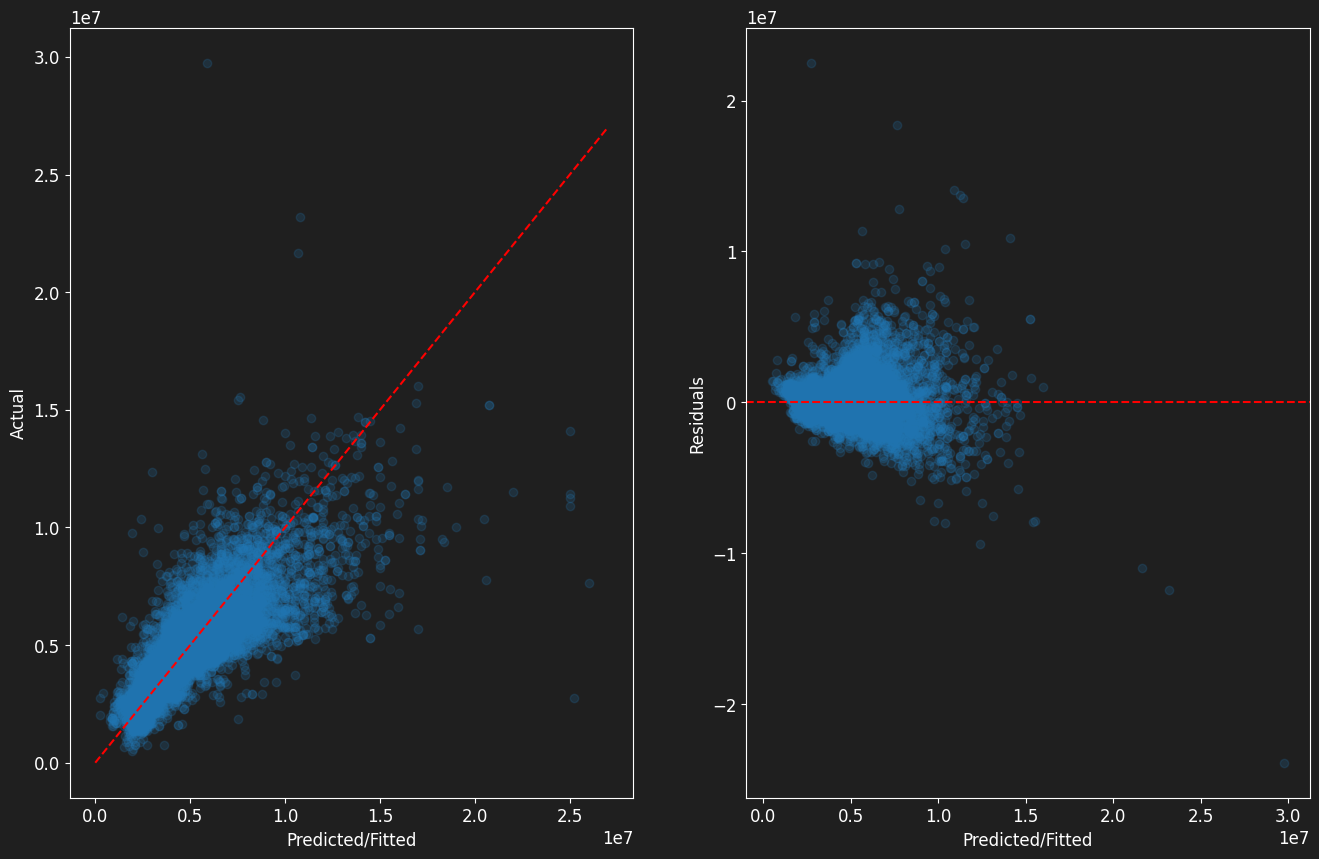

R2: 0.682


In [63]:
line = np.linspace(0, 27000000, 2)

fig, ax = plt.subplots(1, 2)

ax[0].plot(line, line, color = 'red', ls = '--')
ax[0].scatter(y, y_pred, alpha = .2)
ax[0].set_xlabel('Predicted/Fitted')
ax[0].set_ylabel('Actual')

ax[1].scatter(y_pred, y - y_pred, alpha = .2)
ax[1].axhline(0, color = 'red', ls = '--')
ax[1].set_xlabel('Predicted/Fitted')
ax[1].set_ylabel('Residuals')

plt.show()

print(f'R2: {model.score(X, y):.3f}')

In [48]:
dict(zip(X.columns, model.coef_))

{'Primary room': -2207.6892587909624,
 'Usable area': 23989.43116057563,
 'Gross area': -470.22858274220977,
 'Year of construction': -1090.3919564149908,
 'Floor': 128259.63966805139,
 'Plot size': -5.142807831073287,
 'Joint debt at last sale': -0.22182484694962487,
 'Number of rooms': 170375.1178573405,
 'Number of bedrooms': 222569.55288212642,
 'Turnover rate': 95.20555336914133,
 'Postal code': -1362.149991098166,
 'Broker encoded': 31301.4743727554,
 'Housing type encoded': 98821.63526495396,
 'Balcony_Yes': 85384.97013576198,
 'Parking_Yes': -94416.49235165541,
 'Lat': 11007992.983969985,
 'Lon': 1173417.974533664,
 'Year': 3502.1829166911807,
 'Month': 2368.4238935614912,
 'Day': -1511.0022006334204,
 'Policy rate': 3245.8573792565708,
 'CPI': 14231.58836546354,
 'Change CPI': -9012.232124665967,
 'HPI Norway': -14560.673429269083,
 'HPI Trondheim': 29243.06100908136,
 'Borrowing rate%': -36609.03831190249}